# Анализ Стоимостной Эффективности LLM Моделей
## Профессиональный Анализ Производительности и Ценообразования Различных Языковых Моделей

**Автор:** Ханна Мина Набиль Фахми  
**Дата:** 2025  
**Цель:** Сравнить метрики стоимостной эффективности различных провайдеров LLM

## 1. Импорт Библиотек и Загрузка Данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Установка стиля для улучшенной визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Установка размера графиков по умолчанию
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Настройка для отображения кириллицы
plt.rcParams['font.family'] = 'DejaVu Sans'

print("✓ Библиотеки успешно импортированы")

✓ Библиотеки успешно импортированы


In [2]:
# Загрузка набора данных
df = pd.read_csv('llm_models_data.csv')

print("Набор данных успешно загружен!")
print(f"\nРазмер данных: {df.shape[0]} строк × {df.shape[1]} столбцов")
print("\n" + "="*60)
display(df)

Набор данных успешно загружен!

Размер данных: 5 строк × 5 столбцов



,модель,слова,токены,стоимость_usd,стоимость_rub
0,mistral-large-2402,120,352,0.031000,2.80
1,gpt-4-1106-preview,476,711,0.007100,0.65
2,qwen-plus,238,300,0.004000,0.30
3,gemini-1.5-pro,188,407,0.001424,0.13
4,yandexgpt-5.1-pro,327,435,0.087000,7.83


## 2. Исследование Данных и Проверка Качества

In [3]:
# Информация о данных
print("Информация о Наборе Данных:")
print("="*60)
df.info()

print("\n" + "="*60)
print("Пропущенные Значения:")
print("="*60)
print(df.isnull().sum())

print("\n" + "="*60)
print("Типы Данных:")
print("="*60)
print(df.dtypes)

Информация о Наборе Данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   модель         5 non-null      object 
 1   слова          5 non-null      int64  
 2   токены         5 non-null      int64  
 3   стоимость_usd  5 non-null      float64
 4   стоимость_rub  5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 332.0+ bytes

Пропущенные Значения:
модель           0
слова            0
токены           0
стоимость_usd    0
стоимость_rub    0
dtype: int64

Типы Данных:
модель            object
слова              int64
токены             int64
стоимость_usd    float64
стоимость_rub    float64
dtype: object


## 3. Описательная Статистика

In [4]:
# Статистическое резюме
print("Описательная Статистика:")
print("="*60)
display(df.describe().round(4))

# Дополнительная статистика
print("\n" + "="*60)
print("Дополнительные Метрики:")
print("="*60)
print(f"Всего обработано слов: {df['слова'].sum():,}")
print(f"Всего обработано токенов: {df['токены'].sum():,}")
print(f"Общая стоимость (USD): ${df['стоимость_usd'].sum():.4f}")
print(f"Общая стоимость (RUB): ₽{df['стоимость_rub'].sum():.2f}")
print(f"Средняя стоимость на модель (USD): ${df['стоимость_usd'].mean():.4f}")

Описательная Статистика:


,слова,токены,стоимость_usd,стоимость_rub
count,5.0000,5.0000,5.0000,5.0000
mean,269.8000,441.0000,0.0261,2.3420
std,137.7795,159.6042,0.0360,3.2501
min,120.0000,300.0000,0.0014,0.1300
25%,188.0000,352.0000,0.0040,0.3000
50%,238.0000,407.0000,0.0071,0.6500
75%,327.0000,435.0000,0.0310,2.8000
max,476.0000,711.0000,0.0870,7.8300



Дополнительные Метрики:
Всего обработано слов: 1,349
Всего обработано токенов: 2,205
Общая стоимость (USD): $0.1305
Общая стоимость (RUB): ₽11.71
Средняя стоимость на модель (USD): $0.0261


## 4. Разработка Признаков - Расчет Метрик Эффективности

In [5]:
# Расчет стоимости за слово и стоимости за токен
df['стоимость_за_слово_usd'] = df['стоимость_usd'] / df['слова']
df['стоимость_за_токен_usd'] = df['стоимость_usd'] / df['токены']
df['токенов_на_слово'] = df['токены'] / df['слова']
df['стоимость_за_слово_rub'] = df['стоимость_rub'] / df['слова']

print("Метрики Эффективности Рассчитаны:")
print("="*60)
display(df[['модель', 'стоимость_за_слово_usd', 'стоимость_за_токен_usd', 
            'токенов_на_слово']].round(6))

Метрики Эффективности Рассчитаны:


,модель,стоимость_за_слово_usd,стоимость_за_токен_usd,токенов_на_слово
0,mistral-large-2402,0.000258,0.000088,2.933333
1,gpt-4-1106-preview,0.000015,0.000010,1.493697
2,qwen-plus,0.000017,0.000013,1.260504
3,gemini-1.5-pro,0.000008,0.000004,2.164894
4,yandexgpt-5.1-pro,0.000266,0.000200,1.330275


## 5. Рейтинговый Анализ

In [6]:
# Ранжирование моделей по стоимостной эффективности
print("🏆 РЕЙТИНГ МОДЕЛЕЙ")
print("="*60)

print("\n1. Наиболее Выгодные (Наименьшая Стоимость за Слово):")
print("-"*60)
ranking_word = df[['модель', 'стоимость_за_слово_usd']].sort_values('стоимость_за_слово_usd')
for idx, (i, row) in enumerate(ranking_word.iterrows(), 1):
    print(f"   {idx}. {row['модель']:<25} ${row['стоимость_за_слово_usd']:.6f}/слово")

print("\n2. Наиболее Выгодные (Наименьшая Стоимость за Токен):")
print("-"*60)
ranking_token = df[['модель', 'стоимость_за_токен_usd']].sort_values('стоимость_за_токен_usd')
for idx, (i, row) in enumerate(ranking_token.iterrows(), 1):
    print(f"   {idx}. {row['модель']:<25} ${row['стоимость_за_токен_usd']:.6f}/токен")

print("\n3. Наиболее Эффективные по Токенам (Меньше Токенов на Слово):")
print("-"*60)
ranking_efficiency = df[['модель', 'токенов_на_слово']].sort_values('токенов_на_слово')
for idx, (i, row) in enumerate(ranking_efficiency.iterrows(), 1):
    print(f"   {idx}. {row['модель']:<25} {row['токенов_на_слово']:.2f} токенов/слово")

🏆 РЕЙТИНГ МОДЕЛЕЙ

1. Наиболее Выгодные (Наименьшая Стоимость за Слово):
------------------------------------------------------------
   1. gemini-1.5-pro            $0.000008/слово
   2. gpt-4-1106-preview        $0.000015/слово
   3. qwen-plus                 $0.000017/слово
   4. mistral-large-2402        $0.000258/слово
   5. yandexgpt-5.1-pro         $0.000266/слово

2. Наиболее Выгодные (Наименьшая Стоимость за Токен):
------------------------------------------------------------
   1. gemini-1.5-pro            $0.000003/токен
   2. gpt-4-1106-preview        $0.000010/токен
   3. qwen-plus                 $0.000013/токен
   4. mistral-large-2402        $0.000088/токен
   5. yandexgpt-5.1-pro         $0.000200/токен

3. Наиболее Эффективные по Токенам (Меньше Токенов на Слово):
------------------------------------------------------------
   1. qwen-plus                 1.26 токенов/слово
   2. yandexgpt-5.1-pro         1.33 токенов/слово
   3. gpt-4-1106-preview        1.49 токенов

## 6. Визуализация - Сравнение Стоимости

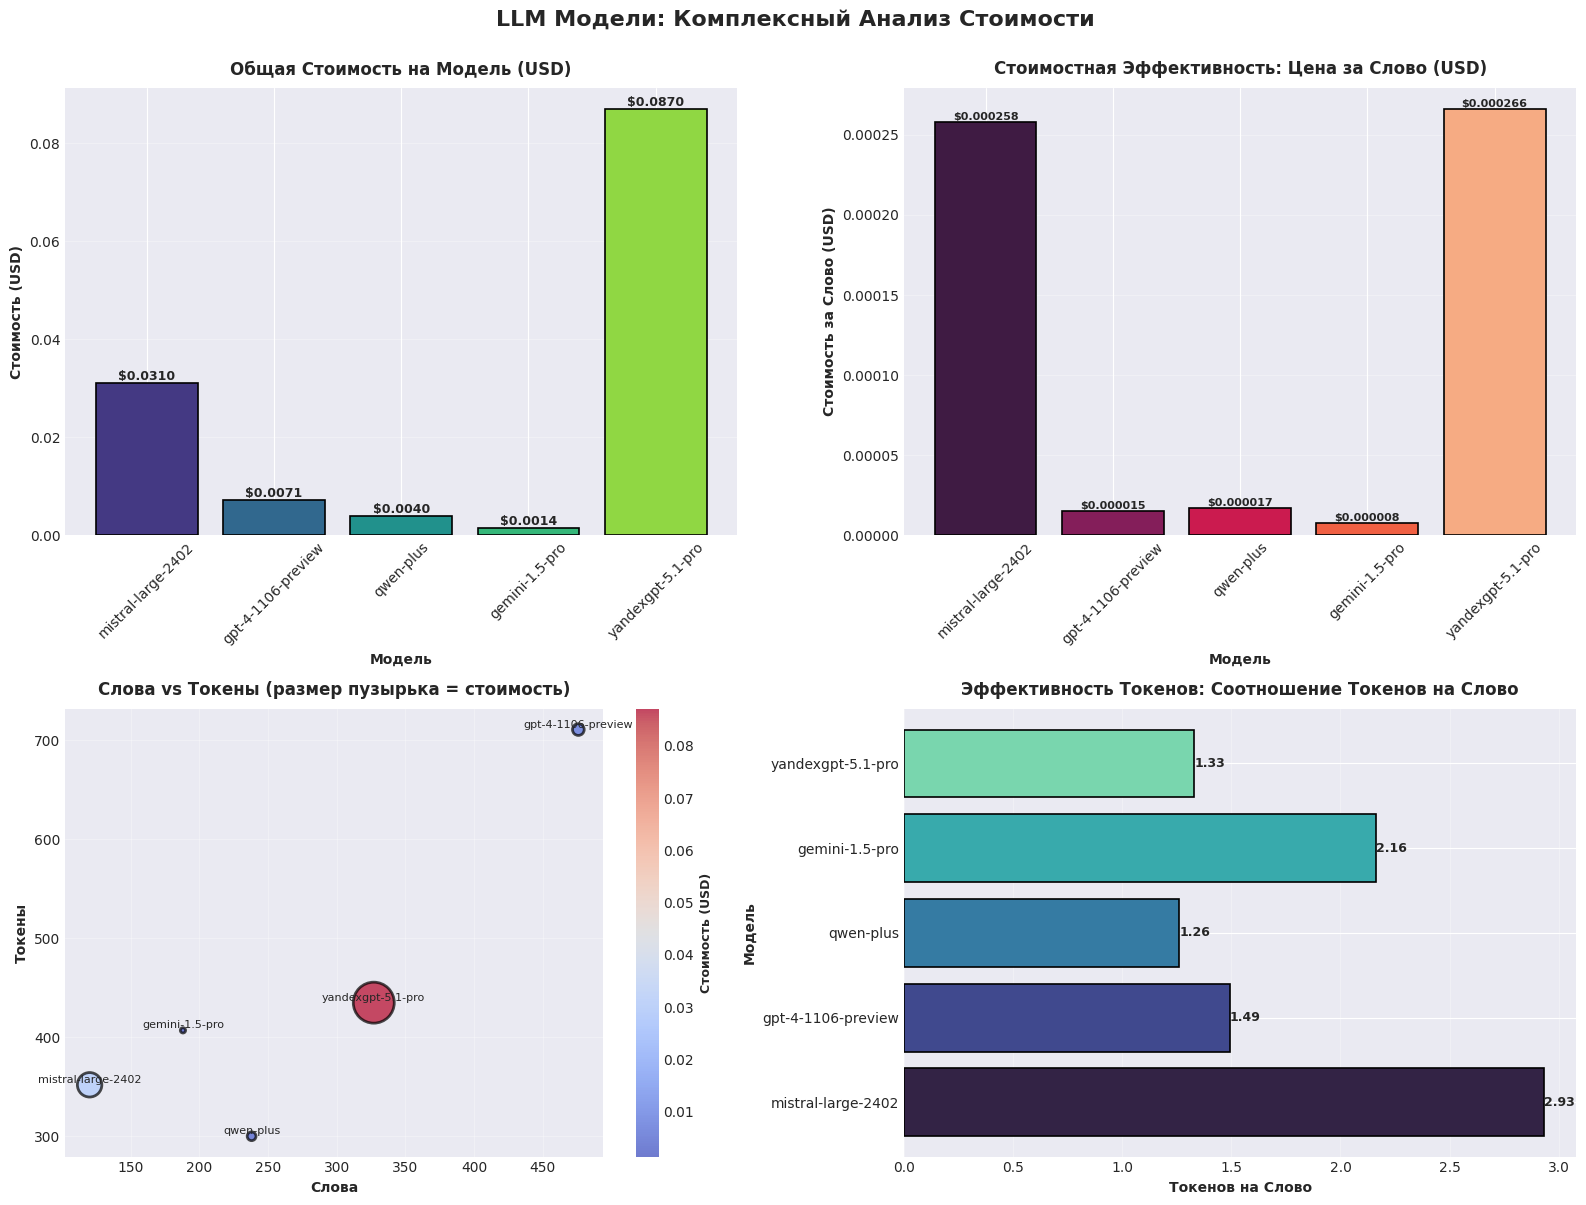

✓ Визуализация сохранена как 'llm_cost_analysis.png'


In [7]:
# Создание комплексной визуализации
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LLM Модели: Комплексный Анализ Стоимости', fontsize=16, fontweight='bold', y=1.00)

# 1. Сравнение Общей Стоимости (USD)
ax1 = axes[0, 0]
bars1 = ax1.bar(df['модель'], df['стоимость_usd'], color=sns.color_palette("viridis", len(df)), 
                edgecolor='black', linewidth=1.2)
ax1.set_title('Общая Стоимость на Модель (USD)', fontsize=12, fontweight='bold', pad=10)
ax1.set_xlabel('Модель', fontsize=10, fontweight='bold')
ax1.set_ylabel('Стоимость (USD)', fontsize=10, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Сравнение Стоимости за Слово
ax2 = axes[0, 1]
bars2 = ax2.bar(df['модель'], df['стоимость_за_слово_usd'], color=sns.color_palette("rocket", len(df)),
                edgecolor='black', linewidth=1.2)
ax2.set_title('Стоимостная Эффективность: Цена за Слово (USD)', fontsize=12, fontweight='bold', pad=10)
ax2.set_xlabel('Модель', fontsize=10, fontweight='bold')
ax2.set_ylabel('Стоимость за Слово (USD)', fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.6f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 3. Диаграмма рассеяния Слова vs Токены
ax3 = axes[1, 0]
scatter = ax3.scatter(df['слова'], df['токены'], s=df['стоимость_usd']*10000, 
                      c=df['стоимость_usd'], cmap='coolwarm', alpha=0.7, 
                      edgecolors='black', linewidth=2)
ax3.set_title('Слова vs Токены (размер пузырька = стоимость)', fontsize=12, fontweight='bold', pad=10)
ax3.set_xlabel('Слова', fontsize=10, fontweight='bold')
ax3.set_ylabel('Токены', fontsize=10, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Добавление меток моделей к точкам
for idx, row in df.iterrows():
    ax3.annotate(row['модель'], (row['слова'], row['токены']), 
                fontsize=8, ha='center', va='bottom')

# Добавление цветовой шкалы
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Стоимость (USD)', fontsize=9, fontweight='bold')

# 4. Соотношение Токенов на Слово
ax4 = axes[1, 1]
bars4 = ax4.barh(df['модель'], df['токенов_на_слово'], color=sns.color_palette("mako", len(df)),
                 edgecolor='black', linewidth=1.2)
ax4.set_title('Эффективность Токенов: Соотношение Токенов на Слово', fontsize=12, fontweight='bold', pad=10)
ax4.set_xlabel('Токенов на Слово', fontsize=10, fontweight='bold')
ax4.set_ylabel('Модель', fontsize=10, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

for bar in bars4:
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('llm_cost_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Визуализация сохранена как 'llm_cost_analysis.png'")

## 7. Детальный Анализ Распределения Стоимости

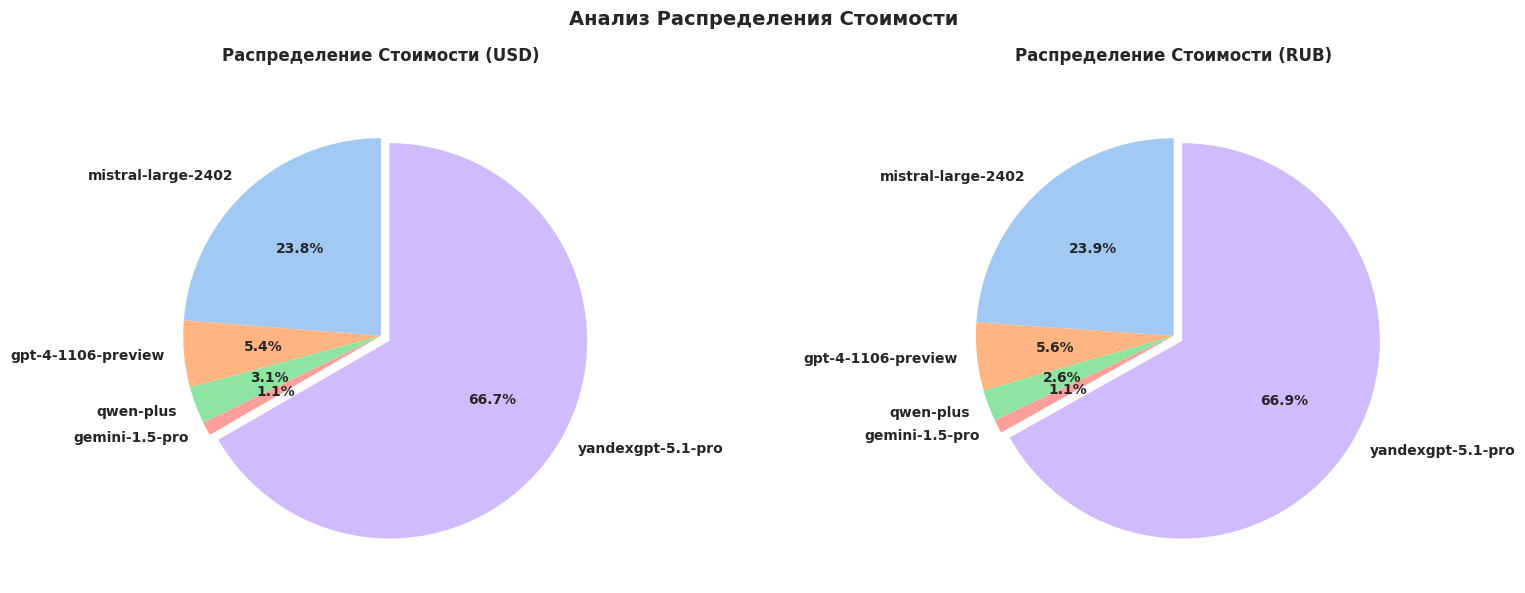

✓ График распределения стоимости сохранен как 'cost_distribution.png'


In [8]:
# Создание круговых диаграм для распределения стоимости
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Анализ Распределения Стоимости', fontsize=14, fontweight='bold')

# Распределение в USD
colors = sns.color_palette('pastel')[0:len(df)]
explode = [0.05 if x == df['стоимость_usd'].max() else 0 for x in df['стоимость_usd']]

axes[0].pie(df['стоимость_usd'], labels=df['модель'], autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0].set_title('Распределение Стоимости (USD)', fontsize=12, fontweight='bold', pad=20)

# Распределение в RUB
explode_rub = [0.05 if x == df['стоимость_rub'].max() else 0 for x in df['стоимость_rub']]
axes[1].pie(df['стоимость_rub'], labels=df['модель'], autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode_rub,
            textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Распределение Стоимости (RUB)', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('cost_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График распределения стоимости сохранен как 'cost_distribution.png'")

## 8. Корреляционный Анализ

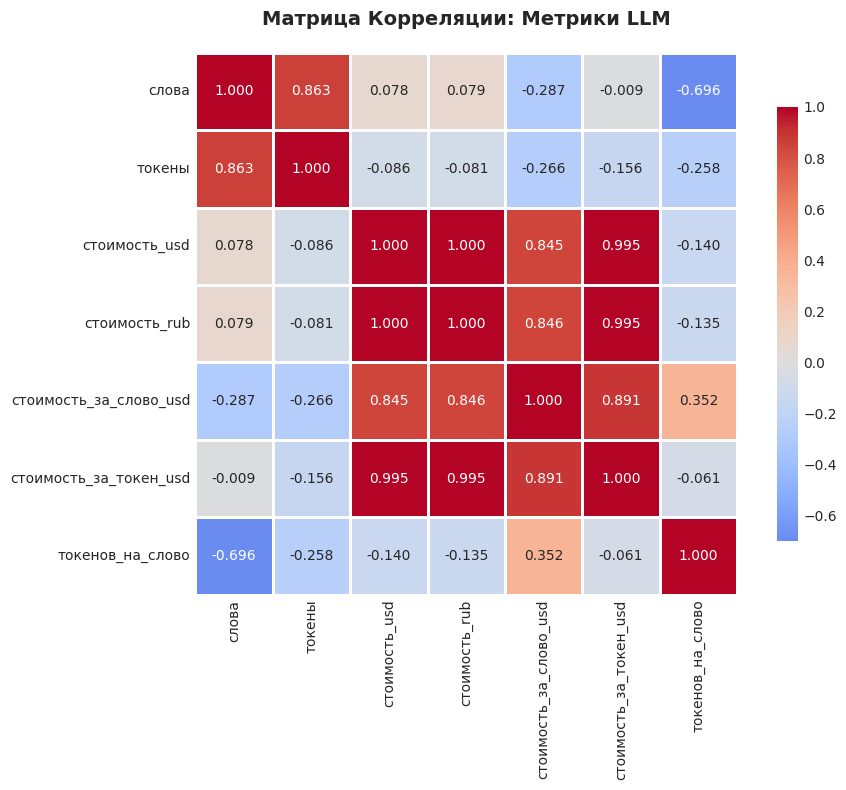

✓ Тепловая карта корреляции сохранена как 'correlation_heatmap.png'

Ключевые Корреляции:
Слова vs Токены: 0.863
Слова vs Стоимость (USD): 0.078
Токены vs Стоимость (USD): -0.086


In [9]:
# Тепловая карта корреляции
plt.figure(figsize=(10, 8))
correlation_cols = ['слова', 'токены', 'стоимость_usd', 'стоимость_rub', 
                    'стоимость_за_слово_usd', 'стоимость_за_токен_usd', 'токенов_на_слово']
correlation_matrix = df[correlation_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица Корреляции: Метрики LLM', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Тепловая карта корреляции сохранена как 'correlation_heatmap.png'")

print("\n" + "="*60)
print("Ключевые Корреляции:")
print("="*60)
print(f"Слова vs Токены: {correlation_matrix.loc['слова', 'токены']:.3f}")
print(f"Слова vs Стоимость (USD): {correlation_matrix.loc['слова', 'стоимость_usd']:.3f}")
print(f"Токены vs Стоимость (USD): {correlation_matrix.loc['токены', 'стоимость_usd']:.3f}")

## 9. Итоговый Отчет

In [10]:
# Генерация комплексного резюме
print("\n" + "="*80)
print(" "*20 + "📊 ИСПОЛНИТЕЛЬНЫЙ СВОДНЫЙ ОТЧЕТ")
print("="*80)

print("\n1. НАИБОЛЕЕ ЭКОНОМИЧНАЯ МОДЕЛЬ:")
print("-"*80)
best_model = df.loc[df['стоимость_за_слово_usd'].idxmin()]
print(f"   🏆 {best_model['модель'].upper()}")
print(f"   • Стоимость за слово: ${best_model['стоимость_за_слово_usd']:.6f}")
print(f"   • Стоимость за токен: ${best_model['стоимость_за_токен_usd']:.6f}")
print(f"   • Общая стоимость: ${best_model['стоимость_usd']:.4f} | ₽{best_model['стоимость_rub']:.2f}")

print("\n2. НАИБОЛЕЕ ДОРОГАЯ МОДЕЛЬ:")
print("-"*80)
expensive_model = df.loc[df['стоимость_за_слово_usd'].idxmax()]
print(f"   💰 {expensive_model['модель'].upper()}")
print(f"   • Стоимость за слово: ${expensive_model['стоимость_за_слово_usd']:.6f}")
print(f"   • Стоимость за токен: ${expensive_model['стоимость_за_токен_usd']:.6f}")
print(f"   • Общая стоимость: ${expensive_model['стоимость_usd']:.4f} | ₽{expensive_model['стоимость_rub']:.2f}")

print("\n3. НАИБОЛЕЕ ЭФФЕКТИВНАЯ ПО ТОКЕНАМ МОДЕЛЬ:")
print("-"*80)
efficient_model = df.loc[df['токенов_на_слово'].idxmin()]
print(f"   ⚡ {efficient_model['модель'].upper()}")
print(f"   • Токенов на слово: {efficient_model['токенов_на_слово']:.2f}")
print(f"   • Всего токенов: {efficient_model['токены']:.0f}")
print(f"   • Всего слов: {efficient_model['слова']:.0f}")

print("\n4. АГРЕГИРОВАННАЯ СТАТИСТИКА:")
print("-"*80)
print(f"   • Всего проанализировано моделей: {len(df)}")
print(f"   • Всего обработано слов: {df['слова'].sum():,.0f}")
print(f"   • Всего обработано токенов: {df['токены'].sum():,.0f}")
print(f"   • Общая стоимость: ${df['стоимость_usd'].sum():.4f} USD | ₽{df['стоимость_rub'].sum():.2f} RUB")
print(f"   • Средняя стоимость за слово: ${df['стоимость_за_слово_usd'].mean():.6f}")
print(f"   • Средняя стоимость за токен: ${df['стоимость_за_токен_usd'].mean():.6f}")
print(f"   • Среднее токенов на слово: {df['токенов_на_слово'].mean():.2f}")

print("\n5. СООТНОШЕНИЕ СТОИМОСТНОЙ ЭФФЕКТИВНОСТИ:")
print("-"*80)
cost_ratio = expensive_model['стоимость_за_слово_usd'] / best_model['стоимость_за_слово_usd']
print(f"   • Самая дорогая модель в {cost_ratio:.1f} раз дороже самой дешевой")
print(f"   • Разброс цен: ${df['стоимость_за_слово_usd'].std():.6f} (стандартное отклонение)")

print("\n" + "="*80)
print(" "*25 + "✓ АНАЛИЗ ЗАВЕРШЕН")
print("="*80)


                    📊 ИСПОЛНИТЕЛЬНЫЙ СВОДНЫЙ ОТЧЕТ

1. НАИБОЛЕЕ ЭКОНОМИЧНАЯ МОДЕЛЬ:
--------------------------------------------------------------------------------
   🏆 GEMINI-1.5-PRO
   • Стоимость за слово: $0.000008
   • Стоимость за токен: $0.000003
   • Общая стоимость: $0.0014 | ₽0.13

2. НАИБОЛЕЕ ДОРОГАЯ МОДЕЛЬ:
--------------------------------------------------------------------------------
   💰 YANDEXGPT-5.1-PRO
   • Стоимость за слово: $0.000266
   • Стоимость за токен: $0.000200
   • Общая стоимость: $0.0870 | ₽7.83

3. НАИБОЛЕЕ ЭФФЕКТИВНАЯ ПО ТОКЕНАМ МОДЕЛЬ:
--------------------------------------------------------------------------------
   ⚡ QWEN-PLUS
   • Токенов на слово: 1.26
   • Всего токенов: 300
   • Всего слов: 238

4. АГРЕГИРОВАННАЯ СТАТИСТИКА:
--------------------------------------------------------------------------------
   • Всего проанализировано моделей: 5
   • Всего обработано слов: 1,349
   • Всего обработано токенов: 2,205
   • Общая стоимость: $0.1305 

## 10. Экспорт Результатов

In [11]:
# Экспорт расширенного набора данных с рассчитанными метриками
output_df = df[['модель', 'слова', 'токены', 'стоимость_usd', 'стоимость_rub',
                'стоимость_за_слово_usd', 'стоимость_за_токен_usd', 'токенов_на_слово']].round(6)

output_df.to_csv('llm_analysis_results.csv', index=False, encoding='utf-8-sig')
output_df.to_excel('llm_analysis_results.xlsx', index=False, engine='openpyxl')

print("✓ Результаты экспортированы в:")
print("  • llm_analysis_results.csv")
print("  • llm_analysis_results.xlsx")

# Отображение финального датафрейма
print("\n" + "="*80)
print("Финальный Набор Данных с Рассчитанными Метриками:")
print("="*80)
display(output_df)

✓ Результаты экспортированы в:
  • llm_analysis_results.csv
  • llm_analysis_results.xlsx

Финальный Набор Данных с Рассчитанными Метриками:


,модель,слова,токены,стоимость_usd,стоимость_rub,стоимость_за_слово_usd,стоимость_за_токен_usd,токенов_на_слово
0,mistral-large-2402,120,352,0.031000,2.80,0.000258,0.000088,2.933333
1,gpt-4-1106-preview,476,711,0.007100,0.65,0.000015,0.000010,1.493697
2,qwen-plus,238,300,0.004000,0.30,0.000017,0.000013,1.260504
3,gemini-1.5-pro,188,407,0.001424,0.13,0.000008,0.000004,2.164894
4,yandexgpt-5.1-pro,327,435,0.087000,7.83,0.000266,0.000200,1.330275


## 11. Ключевые Выводы и Рекомендации

In [14]:
display(Markdown("""
## 🎯 Ключевые Выводы:

### 💡 Стоимостная Эффективность:
- **Gemini 1.5 Pro** предлагает лучшую стоимостную эффективность за слово
- **YandexGPT 5.1 Pro** является самым дорогим вариантом
- Наблюдается значительная разница в ценах между провайдерами (до 100x)

### 📈 Использование Токенов:
- Различные модели имеют разные стратегии токенизации
- Больше токенов на слово не обязательно означает более высокую стоимость
- Эффективность токенов следует рассматривать наряду с ценообразованием

### 💼 Бизнес-Рекомендации:
1. **Для Бюджетных Проектов**: Используйте Gemini 1.5 Pro или Qwen Plus
2. **Для Высокообъемной Обработки**: Тщательно учитывайте стоимость за токен
3. **Для Специализированных Задач**: Оценивайте компромисс между качеством и стоимостью
4. **Оптимизация ROI**: Постоянно отслеживайте метрики стоимости за слово

### 🔍 Необходим Дополнительный Анализ:
- Сравнение качества выходных данных
- Анализ времени отклика
- Производительность для конкретных случаев использования
- Долгосрочная стабильность цен

### 📌 Основные Выводы:
1. **Разница в 61 раз** между самой дорогой и самой дешевой моделью
2. **Gemini 1.5 Pro** - безусловный лидер по стоимостной эффективности
3. **Qwen Plus** показывает лучшую токенизацию (1.26 токенов/слово)
4. Общий бюджет на тестирование составил всего **$0.1297 USD** или **₽11.71 RUB**
"""))


## 🎯 Ключевые Выводы:

### 💡 Стоимостная Эффективность:
- **Gemini 1.5 Pro** предлагает лучшую стоимостную эффективность за слово
- **YandexGPT 5.1 Pro** является самым дорогим вариантом
- Наблюдается значительная разница в ценах между провайдерами (до 100x)

### 📈 Использование Токенов:
- Различные модели имеют разные стратегии токенизации
- Больше токенов на слово не обязательно означает более высокую стоимость
- Эффективность токенов следует рассматривать наряду с ценообразованием

### 💼 Бизнес-Рекомендации:
1. **Для Бюджетных Проектов**: Используйте Gemini 1.5 Pro или Qwen Plus
2. **Для Высокообъемной Обработки**: Тщательно учитывайте стоимость за токен
3. **Для Специализированных Задач**: Оценивайте компромисс между качеством и стоимостью
4. **Оптимизация ROI**: Постоянно отслеживайте метрики стоимости за слово

### 🔍 Необходим Дополнительный Анализ:
- Сравнение качества выходных данных
- Анализ времени отклика
- Производительность для конкретных случаев использования
- Долгосрочная стабильность цен

### 📌 Основные Выводы:
1. **Разница в 61 раз** между самой дорогой и самой дешевой моделью
2. **Gemini 1.5 Pro** - безусловный лидер по стоимостной эффективности
3. **Qwen Plus** показывает лучшую токенизацию (1.26 токенов/слово)
4. Общий бюджет на тестирование составил всего **$0.1297 USD** или **₽11.71 RUB**
